# MLP- Multilayered perceptron

In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
from tensorflow.keras.datasets.mnist import load_data

# from tensorflows documentation 
(x_train, y_train), (x_test, y_test) = load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [2]:
x_train.shape

(60000, 28, 28)

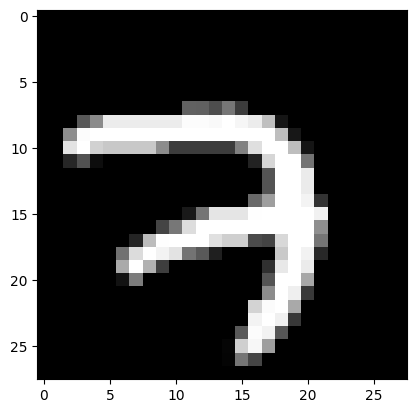

In [3]:
plt.imshow(x_train[5000], cmap="gray")

In [4]:
# 2D image for index 5000 - it contains 28x28 
x_train[5000]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [5]:
x_train[5000].shape


(28, 28)

In [6]:
# pixel intensity between 0 and 254 for this image
x_train[5000].min(), x_train[5000].max()

(0, 254)

In [7]:
# pixel value at row 10, col 5 for image 5000
x_train[5000,10,5]

199

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_train.shape, y_train.min(), y_train.max()

((60000,), 0, 9)

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

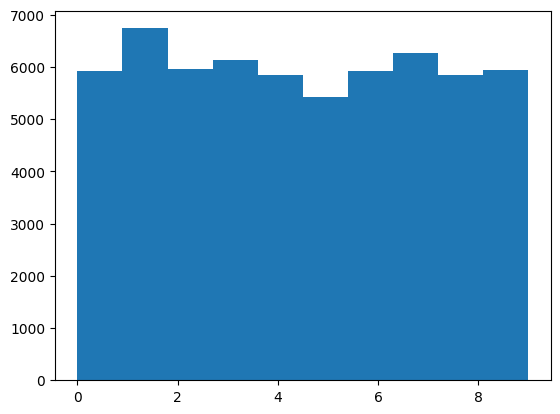

In [10]:
plt.hist(y_train)

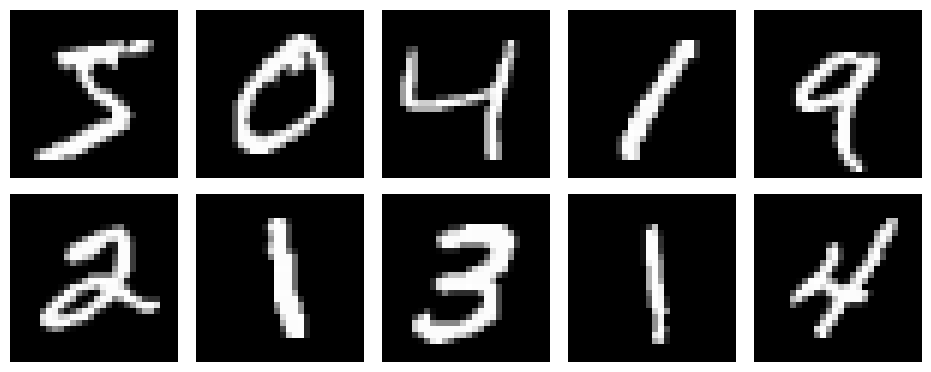

In [11]:
def display_images(data, n_rows= 2, n_cols=5, figsize=(12,4)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)

    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i], cmap="gray")
        ax.axis("off")

    fig.subplots_adjust(wspace=0, hspace=0.1, bottom=0)

display_images(x_train)

In [12]:
x_train[100:110].shape

(10, 28, 28)

# Normalize data

In [13]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

x_train.min(), x_train.max()

(0.0, 1.0)

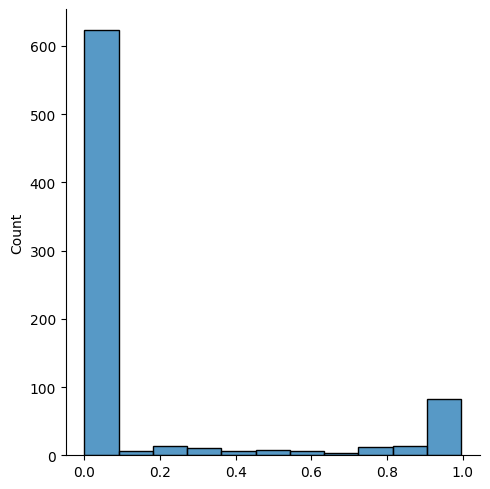

In [14]:
import seaborn as sns

sns.displot(data = x_train[5000].reshape(-1), kind="hist")

## MLP Model

- 10 output neurons/nodes (which represents 0,1,2,3....,9, our classes)
- softmax activation funxtion in output layer --> probabilities
- 784 neurons for input layer (20x20) -> use Flatten layer 
- hidden layers -> Dense

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [16]:
def mlp_model(
    neurons: tuple | list = None,
    names: tuple | list = None,
    activations: tuple | list = [],
):
    model = Sequential(name="MLP_model")
    model.add(Flatten(input_shape=(28, 28), name="Input_layer"))

    # hidden layers + output
    for neuron, name, activation in zip(neurons, names, activations):
        model.add(Dense(neuron, name=name, activation=activation))

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"]
    )

    return model

# naive because we don't have any hidden layers
model_naive = mlp_model(neurons=[10], names=["Output_layer"], activations=["softmax"])
model_naive.summary()

c:\Users\joelh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         7,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model_naive.fit(x_train, y_train, validation_split=1/6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7947 - loss: 0.7829 - val_accuracy: 0.9182 - val_loss: 0.3038
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9102 - loss: 0.3227 - val_accuracy: 0.9243 - val_loss: 0.2780
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9180 - loss: 0.2963 - val_accuracy: 0.9246 - val_loss: 0.2704
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9214 - loss: 0.2812 - val_accuracy: 0.9269 - val_loss: 0.2635
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9232 - loss: 0.2750 - val_accuracy: 0.9295 - val_loss: 0.2611
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9255 - loss: 0.2614 - val_accuracy: 0.9280 - val_loss: 0.2594
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9259 - loss: 0.2634 - val_accuracy: 0.9294 - val_loss: 0.2558
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9250 - loss: 0.2653 - 

In [18]:
import pandas as pd 

naive_history = pd.DataFrame(model_naive.history.history)
naive_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.86912,0.503600,0.9182,0.303825
1,0.91196,0.316638,0.9243,0.278031
2,0.91742,0.292715,0.9246,0.270382
3,0.92126,0.281366,0.9269,0.263511
4,0.92368,0.273171,0.9295,0.261113


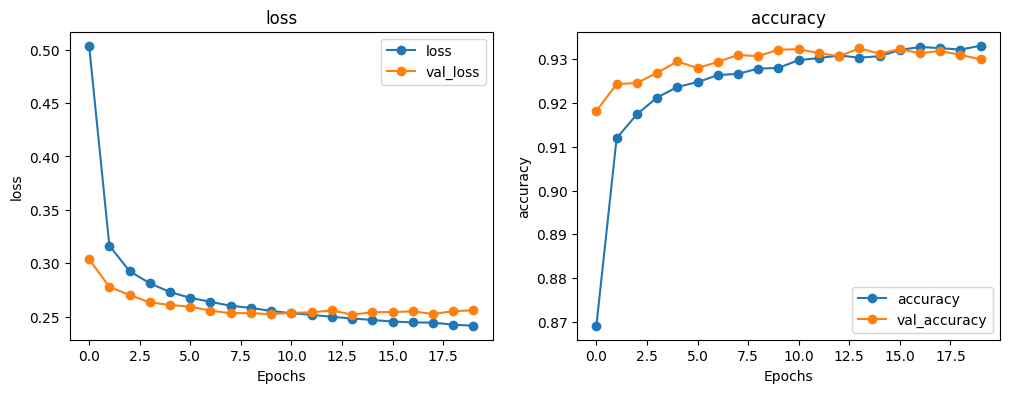

In [19]:
def plot_metrics(df_history, style="-o"):
    _, axes = plt.subplots(1, 2, figsize=(12, 4))
    metrics = [["loss", "val_loss"], ["accuracy", "val_accuracy"]]
    for ax, metric in zip(axes, metrics):
        df_history.plot(
            y=metric,
            xlabel="Epochs",
            ylabel=metric[0],
            title=metric[0],
            ax=ax,
            style=style,
        )


plot_metrics(naive_history)

## Add hidden layers

In [20]:
model_deep = mlp_model(
    neurons=[128, 128, 10],
    activations=["relu", "relu", "softmax"],
    names=["Hidden_1", "Hidden_2", "Output"],
)

model_deep.summary()

c:\Users\joelh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_layer (Flatten)           │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_1 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_2 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model_deep.fit(x_train, y_train, validation_split=1 / 6, epochs=20, verbose=1)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8624 - loss: 0.4664 - val_accuracy: 0.9577 - val_loss: 0.1393
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9652 - loss: 0.1138 - val_accuracy: 0.9678 - val_loss: 0.1054
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9775 - loss: 0.0729 - val_accuracy: 0.9702 - val_loss: 0.0963
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9837 - loss: 0.0528 - val_accuracy: 0.9764 - val_loss: 0.0782
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9878 - loss: 0.0391 - val_accuracy: 0.9765 - val_loss: 0.0854
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9901 - loss: 0.0307 - val_accuracy: 0.9753 - val_loss: 0.0833
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9927 - loss: 0.0232 - val_accuracy: 0.9773 - val_loss: 0.0867
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9936 - loss: 0.0190 - 

In [23]:
deep_history = pd.DataFrame(model_deep.history.history)
deep_history.head()

,accuracy,loss,val_accuracy,val_loss
0,0.92220,0.260540,0.9577,0.139323
1,0.96666,0.108538,0.9678,0.105354
2,0.97674,0.074232,0.9702,0.096343
3,0.98274,0.055254,0.9764,0.078188
4,0.98606,0.044134,0.9765,0.085422


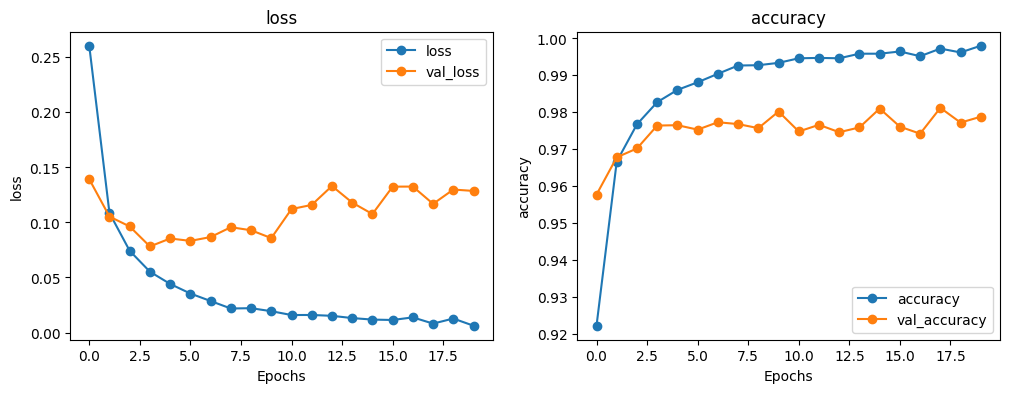

In [24]:
plot_metrics(deep_history)

In [26]:
# trains on all training data (60000)
model_deep.fit(x_train, y_train, epochs = 3, verbose=1)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9909 - loss: 0.0362
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9970 - loss: 0.0112
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9968 - loss: 0.0114


### Prediction and evaluation

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = model_deep.predict(x_test)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[8.6507014e-14, 3.7207955e-15, 2.9408892e-11, ..., 9.9999928e-01,
        2.0232962e-12, 5.4273215e-07],
       [2.3504217e-16, 3.2262353e-08, 1.0000000e+00, ..., 2.2464393e-09,
        4.3786060e-15, 3.2175961e-19],
       [5.6847410e-14, 9.9999774e-01, 3.7583920e-08, ..., 1.9635845e-06,
        2.6964000e-07, 7.4005846e-13],
       ...,
       [1.7102673e-19, 3.4811588e-13, 2.7322890e-20, ..., 3.1023455e-11,
        6.2469682e-11, 1.7658090e-08],
       [3.6006168e-15, 2.3488447e-23, 4.2389796e-19, ..., 7.9568052e-16,
        2.2385934e-14, 2.6502386e-26],
       [1.2837290e-19, 1.4153651e-26, 1.8256858e-22, ..., 3.9915451e-30,
        2.8339413e-22, 4.4561612e-26]], dtype=float32)

In [29]:
y_pred[1]

array([2.3504217e-16, 3.2262353e-08, 1.0000000e+00, 5.5315884e-17,
       2.8803292e-20, 4.7631918e-13, 1.9804004e-17, 2.2464393e-09,
       4.3786060e-15, 3.2175961e-19], dtype=float32)

In [30]:
y_test[1]

2

In [31]:
y_pred.shape

(10000, 10)

In [32]:
y_pred = np.argmax(y_pred, axis=1)
y_pred.shape

(10000,)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.97      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.98      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



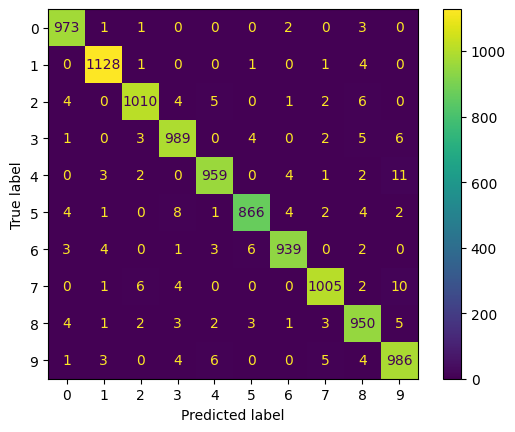

In [34]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [35]:
(y_pred != y_test).sum()

195

## Some misclassifications

In [36]:
misclassified_indices = np.where(y_pred != y_test)[0]
misclassified_indices[:10]

array([149, 217, 247, 266, 321, 340, 445, 449, 495, 619], dtype=int64)

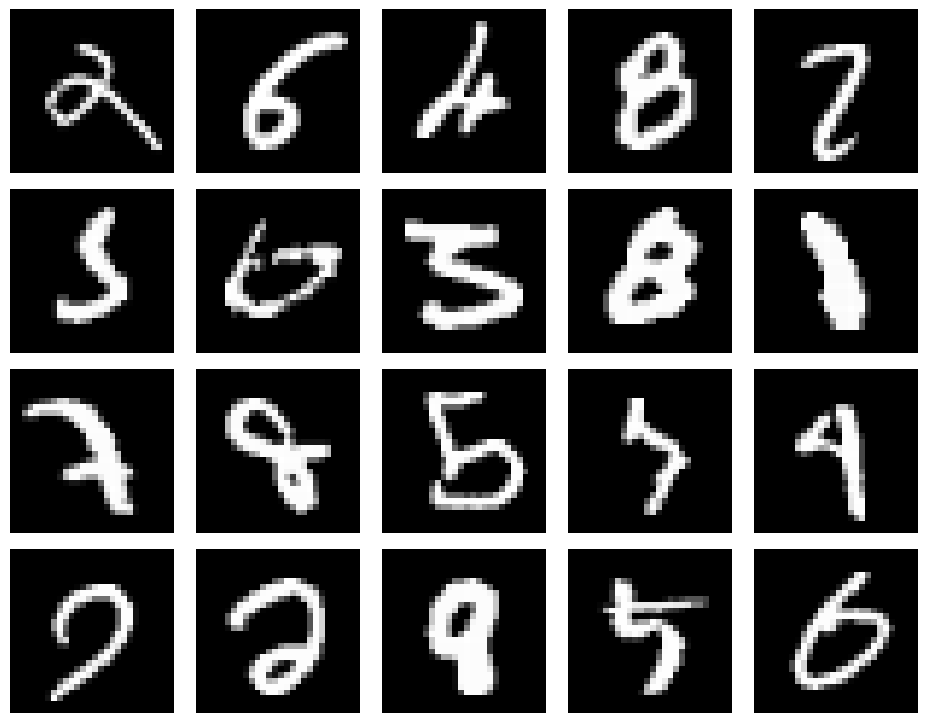

In [38]:
display_images(x_test[misclassified_indices], 4, 5, (12, 8))